## Machine Learning Homework 3

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

pd.options.display.max_rows = 8

#### First, import the red wine csv file into a pandas dataframe from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ (Note: you need to adjust the argument for read_csv() from sep=',' to sep=';'). Use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:

In [2]:
wines = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")

In [3]:
wines.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


#### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.). Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

I first scale the dataset:

In [4]:
X = pd.DataFrame(scale(wines), index=wines.index, columns=wines.columns)

I'm not sure which number of clusters to use, so I run the KMeans() analysis for clusters between 2 and 20 using a for loop. 

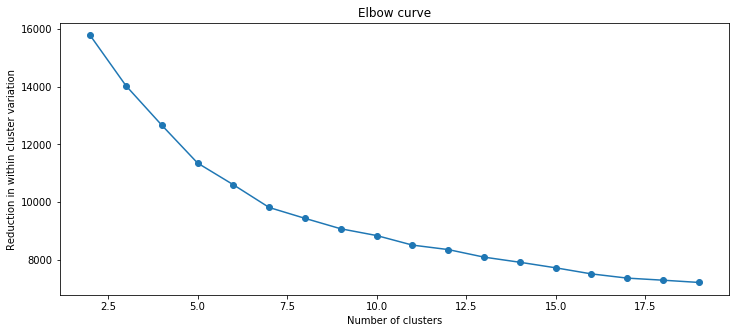

In [5]:
within_cluster_variance = [] #empty results vector

for k in range(2, 20): #loop 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(12, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve');

It looks like 8 clusters could be a reasonable compromise between the explanatory power and complexity of our model.

I took a look below at the variation in cluster means for the 8 cluster model:

In [6]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [7]:
X['cluster'] = kmeans.labels_
display(X.groupby('cluster').mean().sort_values("quality")) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.572051,0.972832,-1.019873,-0.138520,-0.060950,-0.381585,-0.388146,-0.023773,0.658756,-0.408881,-0.424772,-0.613519
5,-0.134113,0.028900,0.058736,-0.016189,-0.049292,1.053857,1.264095,0.189691,-0.082974,-0.168520,-0.550840,-0.422822
6,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440
2,0.034403,-0.140835,-0.017796,-0.289526,-0.016232,-0.632106,-0.413938,0.184391,-0.286941,-0.306182,-0.595521,-0.300314
4,-0.165687,-0.006155,0.293465,5.094012,0.332801,1.727338,1.745694,1.226920,-0.288656,-0.096037,-0.479176,-0.129779
7,1.839623,-0.592370,1.358068,0.213957,0.059733,-0.450928,-0.416823,1.237339,-1.092264,0.377193,0.066858,0.276388
1,-1.078854,0.302473,-0.888185,-0.267885,-0.411568,0.258845,-0.180078,-1.338580,1.134264,-0.111919,1.192315,0.526685
3,0.208450,-1.017770,0.739797,-0.094901,-0.283138,-0.262767,-0.511438,-0.631490,-0.236545,0.476558,1.129947,1.167974


The table is a bit hard to asses because of the number of clusters, so I use look at the correlation wine quality with the other variables.

In [8]:
cluster_results = X.groupby('cluster').mean() #saving cluster mean results in a df

In [9]:
cluster_results.corr()["quality"].sort_values(ascending = False).head(6)

quality          1.000000
alcohol          0.899373
citric acid      0.245795
fixed acidity    0.160452
pH               0.109273
sulphates       -0.054347
Name: quality, dtype: float64

Alcohol has an extremely strong positive relationship with wine quality. pH and citric acid have a posititive, but relatively low, relationship with wine. Fixed acidity is essentially uncorrelated with wine quality.

In [10]:
cluster_results.corr()["quality"].sort_values().head(7)

volatile acidity       -0.712375
density                -0.406225
total sulfur dioxide   -0.386223
chlorides              -0.301039
free sulfur dioxide    -0.158917
residual sugar         -0.080026
sulphates              -0.054347
Name: quality, dtype: float64

Sulphates and residual sugar have weak negative relationships with wine quality. Volatile acidity, total sulfur dioxide, density, chlorides, and free sulfur dioxide all have negative relationships with wine quality.

In [11]:
cluster_results.corr()["quality"].abs().sort_values(ascending = False).head(5)

quality                 1.000000
alcohol                 0.899373
volatile acidity        0.712375
density                 0.406225
total sulfur dioxide    0.386223
Name: quality, dtype: float64

The most important variables are alcohol, volatilite acidity, total suflur dioxide and density. The latter three need to be minimized for good wine.

#### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1. Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [12]:
cluster_agg = AgglomerativeClustering(n_clusters= 8, affinity='euclidean', linkage='complete')
labels = cluster_agg.fit_predict(X)    # cluster labels for all obsv

As I did before, I take the cluster means for all variables, then examine the correlation between wine quality and the other xs.

In [13]:
X['cluster'] = labels
agg_cluster_results = X.groupby('cluster').mean()
agg_cluster_results.corr()["quality"].sort_values(ascending = False).iloc[:5]

quality                 1.000000
alcohol                 0.855249
free sulfur dioxide     0.610786
total sulfur dioxide    0.603586
residual sugar          0.462939
Name: quality, dtype: float64

Alcohol has a very strong positive relationship with wine quality. Free sulfur dioxide, total sulfure dioxide and pH have a positive relationships with wine quality. 

In [14]:
agg_cluster_results.corr()["quality"].sort_values(ascending = False).iloc[5:]

pH                  0.359196
fixed acidity      -0.122239
citric acid        -0.301679
density            -0.458361
volatile acidity   -0.507751
sulphates          -0.775104
chlorides          -0.790497
Name: quality, dtype: float64

Fixed acidity and residual sugar both have an extremely weak relationship to wine quality. Citric acidity has a negative relationship with wine quality. Volatile acidity, chlorides, density and sulphates have a strong negative relationship with wine quality. 

In [15]:
agg_cluster_results.corr()["quality"].abs().sort_values(ascending = False).head(5)

quality                1.000000
alcohol                0.855249
chlorides              0.790497
sulphates              0.775104
free sulfur dioxide    0.610786
Name: quality, dtype: float64

The variables that are most important to make a good wine are alcohol, chlorides, density, and sulphates. The latter three need to be minimized.

My conclusions are different. Though alcohol remains very significant in both analysis, the other four variables with the strongest correlation to wine have changed. One of them (sulphates) had even one of the weakest relationships with wine quality in the KMeans analysis. Residual sugar and fixed acidity, however, have remained insignificant.

We can use scatterplots to see how the relationship between the variables has changed:

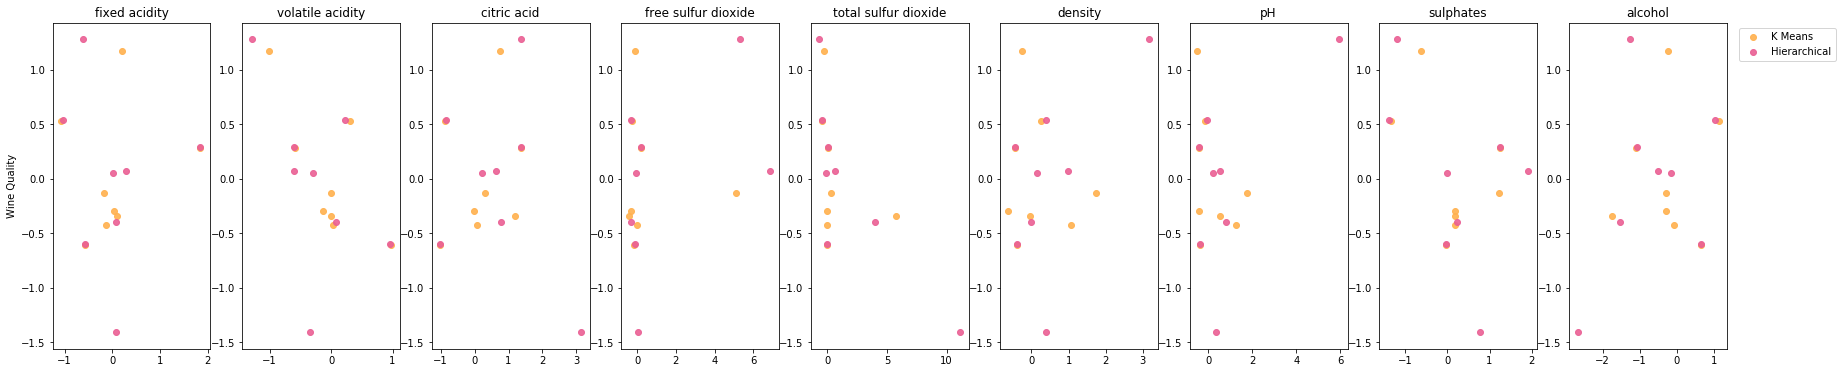

In [16]:
y = agg_cluster_results.columns[agg_cluster_results.columns.isin(["quality", "residual sugar", "chlorides"]) == False]

fig, ax = plt.subplots(1, len(y), figsize = (30, 6))

for i in range(0, len(y)):
    ax[i].scatter(cluster_results.iloc[:, i], cluster_results["quality"], color = "#ffb14e", alpha = 0.9)
    ax[i].scatter(agg_cluster_results.iloc[:, i], agg_cluster_results["quality"], color = "#ea5f94", alpha = 0.9)
    ax[i].set_title(y[i])

ax[0].set_ylabel("Wine Quality")
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, labels = ["K Means", "Hierarchical"]);

The results are different but visually don't seem *that* different. Overal, the slope of the relationship seems to be the same for each variable. It could be that the correlations are too sensitive to the change in means, given that we have very few data points.

#### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [17]:
pca = PCA(n_components = 2)
pca.fit(wines)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
np.cumsum(pca.fit(wines).explained_variance_ratio_)

array([ 0.94607951,  0.99442786])

The first two loadings explain 99.44% of the variance. 

We could use the transformation matrix obtained through PCA on our Y matrix, then regress Y on our PCA vectors.